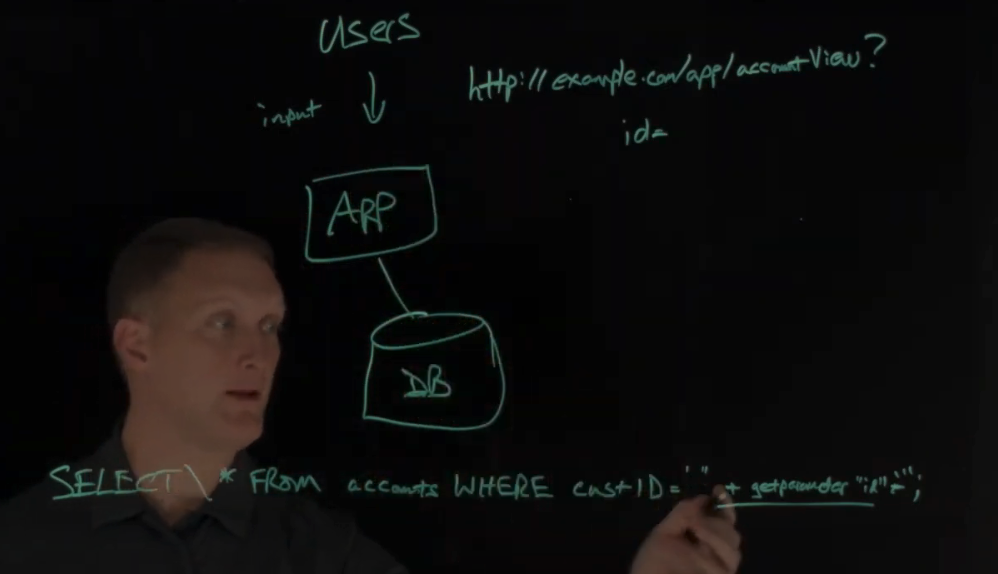

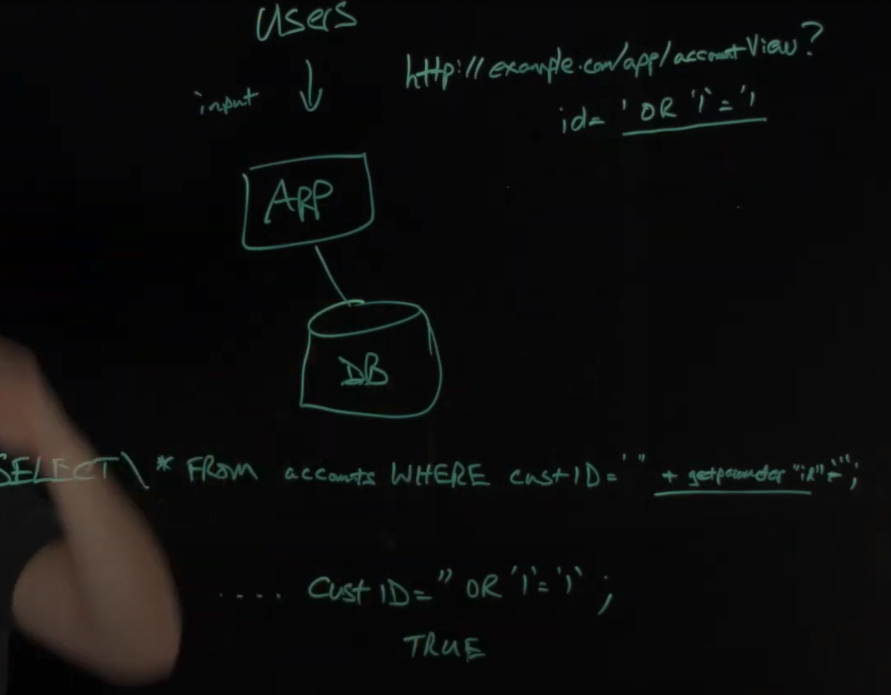

jugaad sol  
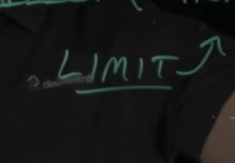

USE ORM and not raw SQL

1. Use Parameterized Queries (Prepared Statements)
Parameterized queries ensure that user input is treated as data, not as executable code.
Prepared statements separate SQL code from user input, preventing attackers from injecting malicious SQL.
Example in Java:

java
Copy code
String query = "SELECT * FROM users WHERE username = ? AND password = ?";
PreparedStatement pstmt = connection.prepareStatement(query);
pstmt.setString(1, username);
pstmt.setString(2, password);
ResultSet rs = pstmt.executeQuery();

2. Use Stored Procedures
Stored procedures are precompiled SQL queries stored in the database. They limit the scope of user inputs.
Ensure the stored procedure does not dynamically construct SQL queries using user inputs.
Example:

sql
Copy code
CREATE PROCEDURE AuthenticateUser (
    @username NVARCHAR(50),
    @password NVARCHAR(50)
)
AS
BEGIN
    SELECT * FROM users WHERE username = @username AND password = @password;
END;


3. Validate and Sanitize User Input
Validate: Ensure that user inputs conform to the expected format (e.g., email, numbers, specific strings).
Sanitize: Strip out or escape dangerous characters like ', ;, --, and /*.
Example in Python:

python
Copy code
import re

def validate_username(username):
    if not re.match("^[a-zA-Z0-9_]+$", username):
        raise ValueError("Invalid username format")

6. Least Privilege Principle
Limit the database permissions of application accounts. For example:
Use a database user account with only SELECT, INSERT, UPDATE, or DELETE privileges as needed.
Avoid granting administrative privileges (e.g., DROP, ALTER) to the application.


12. Avoid Displaying SQL Error Messages
Configure the application to show generic error messages instead of detailed SQL errors. This prevents attackers from gaining insights into the database structure.